The parameters included are :

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree, export_text

In [14]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.columns = df.columns.str.strip()
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [17]:
df = df.drop('Serial No.', axis=1)

In [18]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [20]:
# 3. Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52)
print(X_train.shape[0])
print(X_test.shape[0])

375
125


In [21]:
# 4.1. Линейная регрессия
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [22]:
# 4.2. SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

In [23]:
# 4.3. Дерево решений
dt_model = DecisionTreeRegressor(random_state=52)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [29]:
# 5. Сравнение качества моделей

# Метрики Линейной регрессии
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Метрики SVR
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

# Метрики Дерева решений
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print("         Линейная регрессия                  SVR                    Дерево решений")
print(f"R^2:       {r2_lr:.4f}                           {r2_svr:.4f}                     {r2_dt:.4f}")
print(f"MAE:       {mae_lr:.4f}                           {mae_svr:.4f}                     {mae_dt:.4f}")
print(f"MSE:       {mse_lr:.4f}                           {mse_svr:.4f}                     {mse_dt:.4f}")
print(f"RMSE:      {rmse_lr:.4f}                           {rmse_svr:.4f}                     {rmse_dt:.4f}")

         Линейная регрессия                  SVR                    Дерево решений
R^2:       0.8670                           0.7264                     0.5707
MAE:       0.0401                           0.0608                     0.0646
MSE:       0.0027                           0.0056                     0.0088
RMSE:      0.0522                           0.0748                     0.0937


Линейная регрессия для данной задачи показывает себя наиболее точной, что и неудивительно

             Feature  Importance
5               CGPA    0.811510
0          GRE Score    0.059737
1        TOEFL Score    0.038192
3                SOP    0.037547
4                LOR    0.027287
6           Research    0.013805
2  University Rating    0.011921


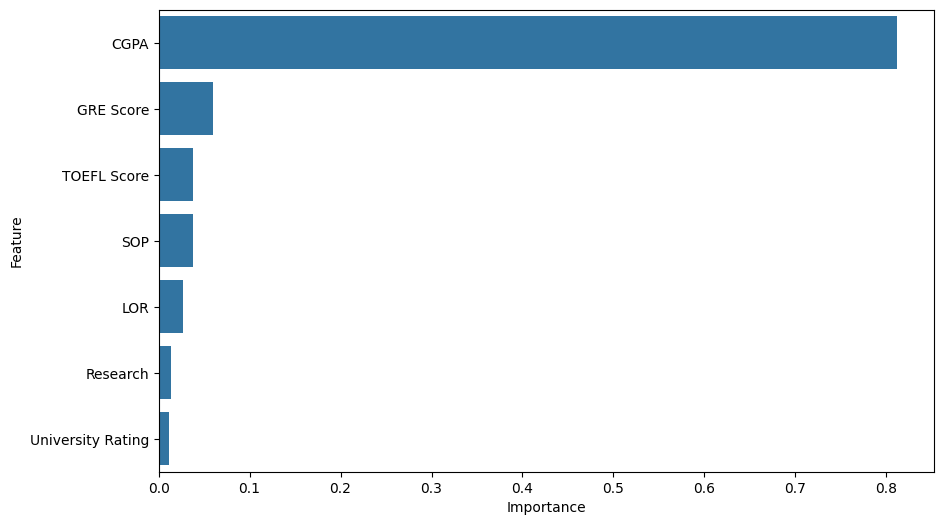

In [37]:
# 6. Важность признаков
feature_importances = dt_model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

# График важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.show()

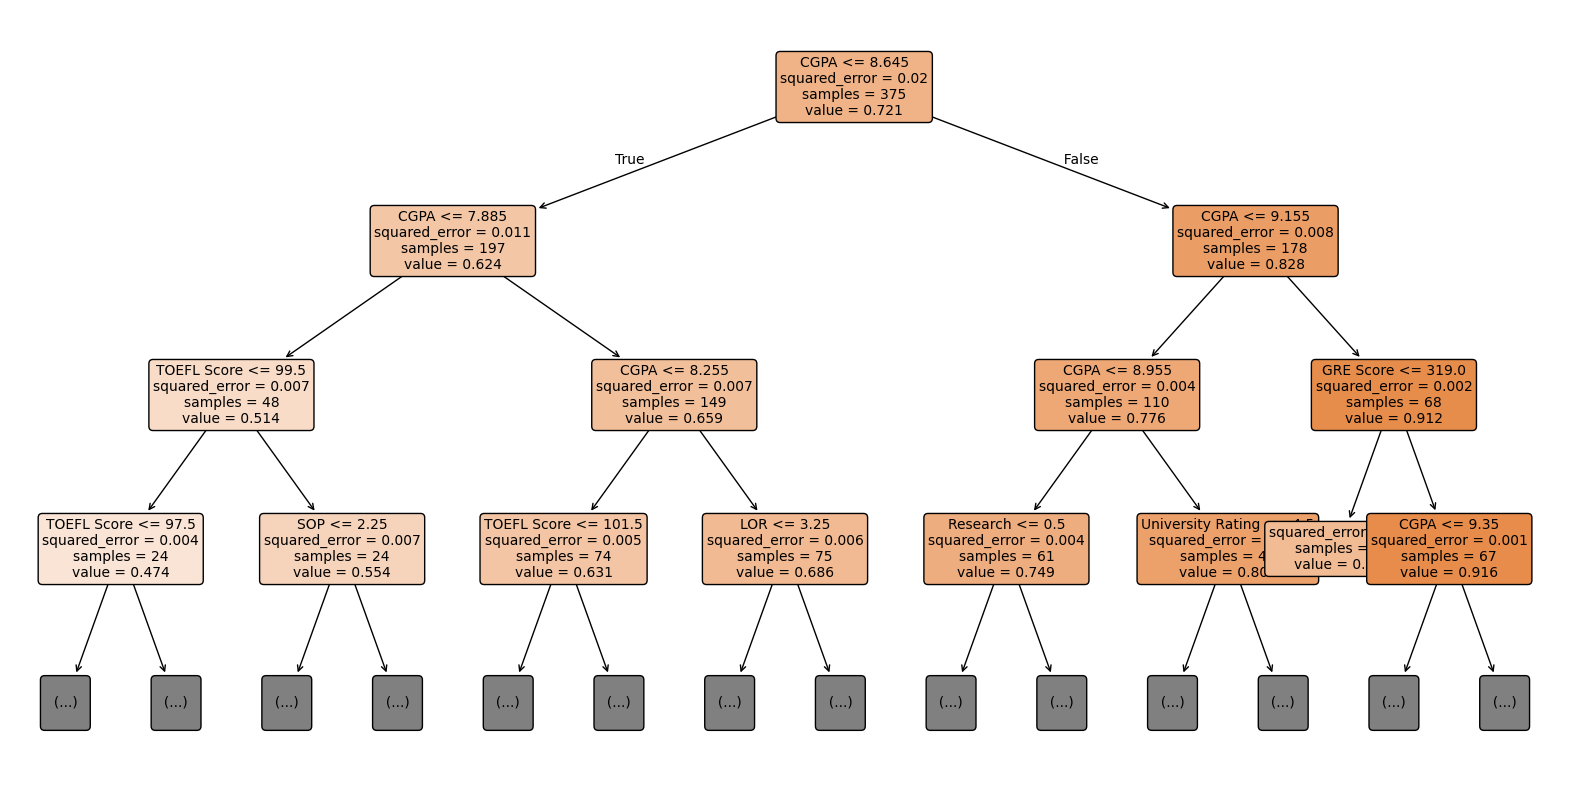




Правила Дерева решений:
|--- CGPA <= 8.64
|   |--- CGPA <= 7.88
|   |   |--- TOEFL Score <= 99.50
|   |   |   |--- TOEFL Score <= 97.50
|   |   |   |   |--- SOP <= 2.25
|   |   |   |   |   |--- CGPA <= 7.83
|   |   |   |   |   |   |--- LOR <= 1.25
|   |   |   |   |   |   |   |--- value: [0.42]
|   |   |   |   |   |   |--- LOR >  1.25
|   |   |   |   |   |   |   |--- CGPA <= 7.50
|   |   |   |   |   |   |   |   |--- LOR <= 2.50
|   |   |   |   |   |   |   |   |   |--- University Rating <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- value: [0.46]
|   |   |   |   |   |   |   |   |   |--- University Rating >  1.50
|   |   |   |   |   |   |   |   |   |   |--- value: [0.47]
|   |   |   |   |   |   |   |   |--- LOR >  2.50
|   |   |   |   |   |   |   |   |   |--- value: [0.45]
|   |   |   |   |   |   |   |--- CGPA >  7.50
|   |   |   |   |   |   |   |   |--- GRE Score <= 300.00
|   |   |   |   |   |   |   |   |   |--- value: [0.49]
|   |   |   |   |   |   |   |   |--- GRE Score >  30

In [41]:
# 8. Визуализация дерева решений
plt.figure(figsize=(20, 10))
#plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, max_depth=3, fontsize=10)
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, max_depth=3, fontsize=10)
plt.show()

print("\n\n\nПравила Дерева решений:")
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)